# Big Mart Sales - Starter Notebook

This notebook should help you get started with the 'Big Mart Sales'. In it we cover:
- Loading the data
- EDA and feature engineering
We want to learn how to EDA and Feature engineering.


In [1]:
import pandas as pd
import numpy as np
import hashlib
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load datasets
directory = 'datasets/analytics_vidhya/'  
train =pd.read_csv(directory+'trainv.csv') 
test =pd.read_csv(directory+'testv.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Explonatory Data Analysis (EDA)
        Steps to prepare data for modelling:
        1. Variable identification
        2. Univariate Analysis
        3. Bi-variate analysis
        4. Missing values treatment
        5. Outlier Treatment
        
        
# Feature Engineering
        6. Variable transformation
        7. Variable creation

## Univariate

In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


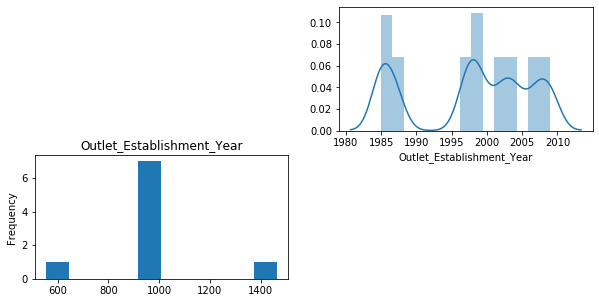

In [6]:
plt.figure(1)

# plt.subplot(221)
# train['Outlet_Establishment_Year'].value_counts(normalize=False).plot.bar(figsize=(10,5),title='Outlet_Establishment_Year')
plt.subplot(222)
sb.distplot(train['Outlet_Establishment_Year']);
plt.subplot(223)
train['Outlet_Establishment_Year'].value_counts(normalize=False).plot.hist(figsize=(10,5),title='Outlet_Establishment_Year')
plt.show()

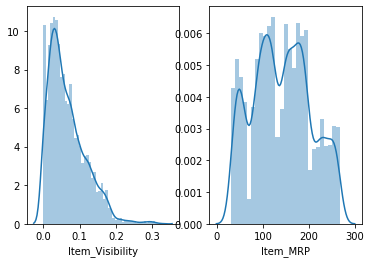

In [7]:
plt.figure(2)

plt.subplot(121)
sb.distplot(train['Item_Visibility']);

plt.subplot(122)
sb.distplot(train['Item_MRP']);
plt.show()

### Categorical

In [8]:
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


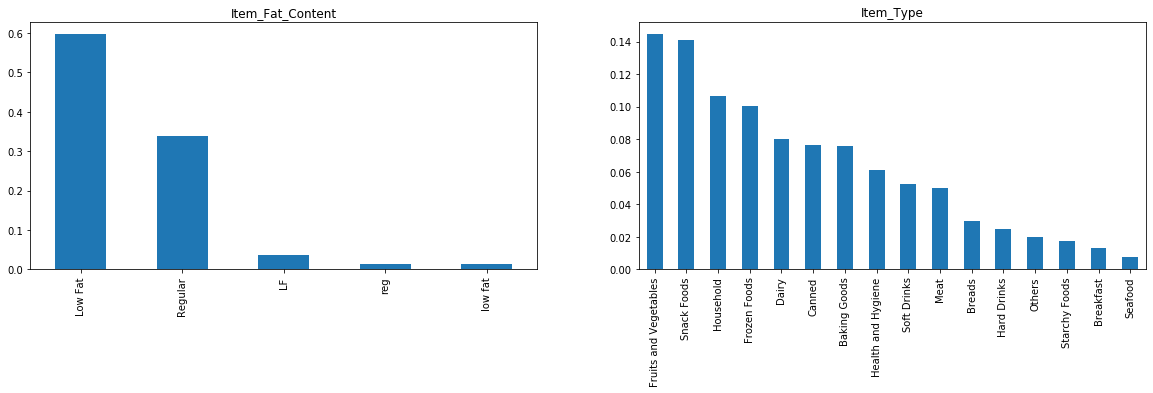

In [9]:
plt.figure(1)

# plt.subplot(221)
# train['Item_Identifier'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Item_Identifier')

plt.subplot(221)
train['Item_Fat_Content'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Item_Fat_Content')

plt.subplot(222)
train['Item_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Item_Type')

plt.show()




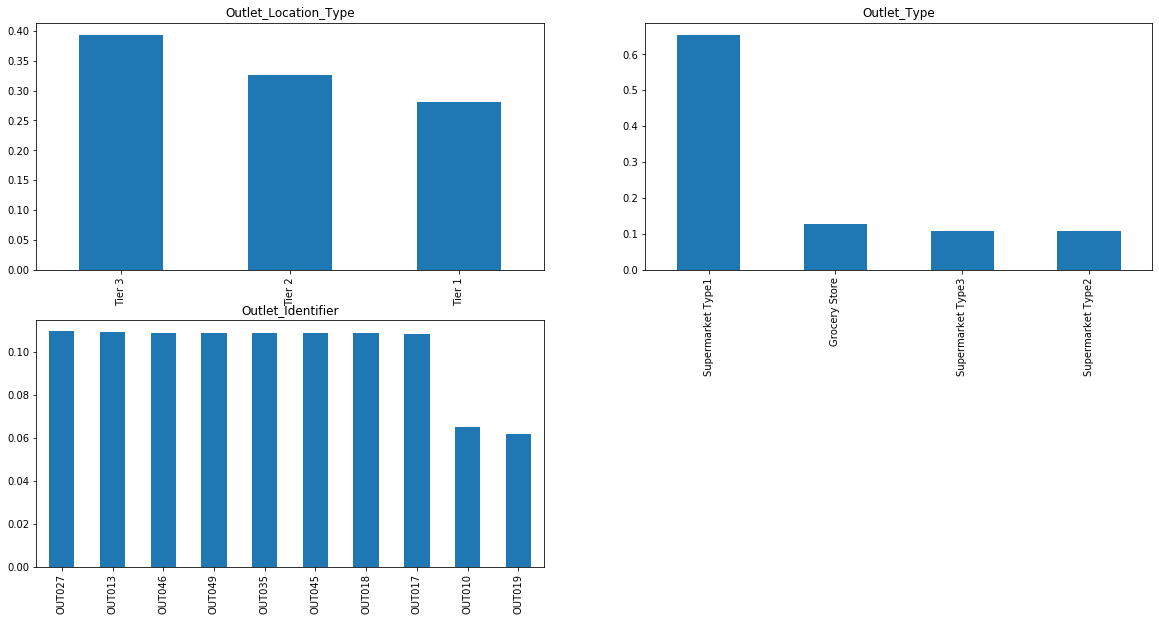

In [10]:

plt.subplot(223)
train['Outlet_Identifier'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Outlet_Identifier')

plt.subplot(221)
train['Outlet_Location_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Outlet_Location_Type')

plt.subplot(222)
train['Outlet_Type'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Outlet_Type')


## Bi-variate analysis

In [11]:
# Look at correlation with target
corr_matrix = train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003EF19E42E8>,
      dtype=object)

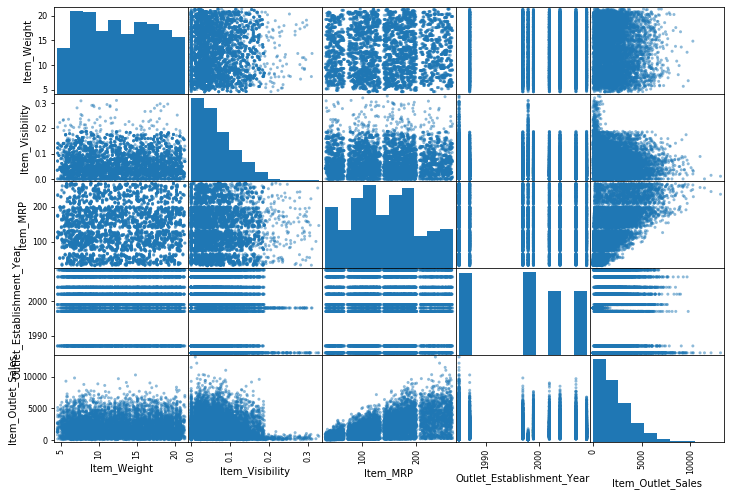

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]
scatter_matrix(train[attributes], figsize=(12, 8))

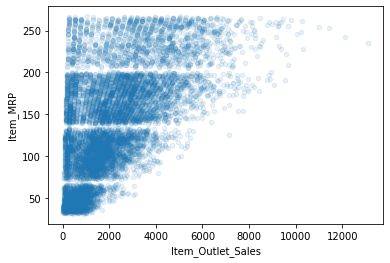

In [13]:
train.plot(kind="scatter", x="Item_Outlet_Sales", y="Item_MRP",
alpha=0.1)

From the above analysis we can see that there is no correlation. Item_Outlet_Sales and Item_MRP have a moderate positive correlation.

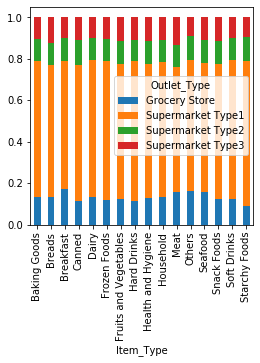

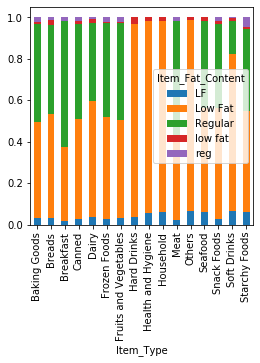

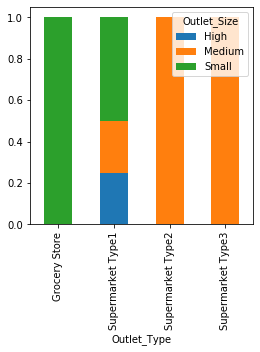

In [14]:
Item_Type=pd.crosstab(train['Item_Type'],train['Outlet_Type'])
Item_Type_2=pd.crosstab(train['Item_Type'],train['Item_Fat_Content'])
Outlet_Type=pd.crosstab(train['Outlet_Type'],train['Outlet_Size'])

Item_Type.div(Item_Type.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Item_Type_2.div(Item_Type_2.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Outlet_Type.div(Outlet_Type.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


## Missing value treatment

In [15]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
train.fillna(train.mean(), inplace=True)

In [17]:
train['Outlet_Size']=train['Outlet_Size'].replace(np.nan,'None')

In [18]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode(), inplace=True)

## Outliers

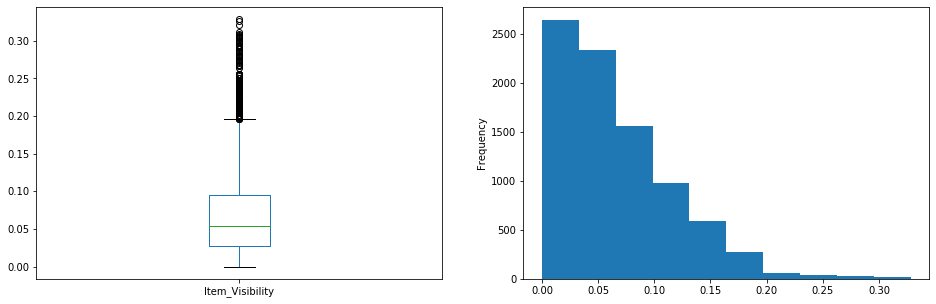

In [19]:
plt.figure(1)
plt.subplot(121)
train['Item_Visibility'].plot.box(figsize=(16,5))
plt.subplot(122)
train['Item_Visibility'].plot.hist(figsize=(16,5))
plt.show()

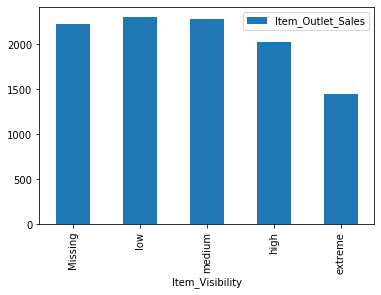

In [20]:
#use pandas.cut() for creating bins
cut_points = [-1,0,0.05, 0.10, 0.15, 0.4]
label_names = ["Missing", 'low', "medium", 'high', "extreme"] 

def process_vis(df,cut_points,label_names,attribute):
    df[attribute] = df[attribute].fillna(-0.5)
    df["Item_Visibility"] = pd.cut(df[attribute],cut_points,labels=label_names)
    return df

train = process_vis(train,cut_points,label_names,'Item_Visibility')

Item_Visibility_pivot = train.pivot_table(index="Item_Visibility",values="Item_Outlet_Sales")
Item_Visibility_pivot.plot.bar()
plt.show()


In [21]:
train['Outlet_Size'].value_counts()

Medium    2793
None      2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('LF', 'Low Fat').replace('low fat', 'Low Fat').replace('reg','Regular')

In [23]:
from sklearn.preprocessing import LabelEncoder

labelencoder =LabelEncoder()
train['Item_Fat_Content']=labelencoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type']=labelencoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier']=labelencoder.fit_transform(train['Outlet_Identifier'])
train['Item_Identifier']=labelencoder.fit_transform(train['Item_Identifier'])
train['Outlet_Type']=labelencoder.fit_transform(train['Outlet_Type'])
train['Outlet_Location_Type']=labelencoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Size']=labelencoder.fit_transform(train['Outlet_Size'])
train['Item_Visibility']=labelencoder.fit_transform(train['Item_Visibility'])